# Music classfication using FFT (with 1000 coefficients)

In [38]:
# import Libraries
import scipy
from matplotlib.pyplot import specgram
from scipy import io
import scipy.io.wavfile
import soundfile as sf
import numpy as np
import pandas as pd
from scipy.fftpack import fft
# scaling training data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import librosa
import timeit
import os

In [39]:
# import LR and SVM classifieres and confusion matrix
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)

from sklearn import svm
clf_svm = svm.SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Using training data

In [40]:
# get training data and FFT feature extraction
fun_dict={}
dir = 'combinedata/'

start_time = timeit.default_timer()
for root, dirs, files in os.walk(dir):
        for name in files:
#            print('\t%s' % name)
            data, samplerate = sf.read(dir+name)
            fun_dict[name]=abs(scipy.fft(data)[:1000])
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

--- 525.5462911607483 seconds ---


In [41]:
# convert dictionary to  dataframe
df=pd.DataFrame(fun_dict)
df2=df.transpose()
l=df2.index
class_response = pd.DataFrame(l.str.split('.',1).tolist(),columns = ['response','rest']) # get labels of the song
df2.index = range(0,len(df2)) #training dataset without class response
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,39.499054,18.649549,18.550576,18.529050,18.804947,18.775389,18.321803,18.401413,19.326070,17.785315,...,102.918061,187.104911,142.977607,95.976178,295.916948,450.439798,85.201265,27.386383,294.552749,144.332231
1,25.374573,3.949766,3.915340,3.901432,3.873195,4.018279,4.172549,4.909501,4.058086,4.112753,...,178.794649,63.280778,194.947252,483.682259,131.197313,74.365096,71.722307,131.907364,20.660168,387.110065
2,14.562988,1.586748,1.384224,5.455291,2.117959,2.728220,6.919267,0.590757,2.421011,3.071282,...,226.331492,44.375736,171.533997,202.789900,157.394394,229.353199,102.597505,127.086622,142.980742,28.822058
3,9.594940,3.382466,3.418242,3.476967,3.483144,3.555649,3.440703,3.454466,3.185912,3.327314,...,28.626326,14.534632,12.669997,16.942521,11.114742,8.052195,4.629748,17.562626,21.600578,3.891404
4,18.533356,0.508331,0.464261,0.438117,0.514587,0.610466,0.747763,0.747204,0.657612,0.510598,...,15.777352,6.034920,16.179422,3.516496,6.564910,11.679650,13.783429,14.582200,14.843703,12.917248


In [42]:
# scaling of traing data with standard scalar
scaler=StandardScaler()
train_fftdata =pd.DataFrame(df2)
scaler.fit(train_fftdata)
scaled_train_data = scaler.transform(train_fftdata)

In [43]:
# assign new variables namely X and y for taining features and labels
X = scaled_train_data
y = class_response.response

In [44]:
# run train test split for the training data
test_sz = 0.3 # test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sz, random_state=42)

In [45]:
# logistic regression (LR)
clf_lr.fit(X_train,y_train) # train the classifier:
y_pred = clf_lr.predict(X_test) # predict levels
cnf_matrix = confusion_matrix(y_test, y_pred) # Confusion matrix
cnf_matrix

array([[11,  3,  3,  1,  0,  2,  1,  4,  4,  1],
       [ 0, 14,  3,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 13,  5,  0,  0,  0,  0,  4,  2],
       [ 0,  5,  9,  4,  0,  4,  2,  2,  5,  2],
       [ 3,  2,  3,  4,  6,  3,  5,  4,  2,  3],
       [ 2,  6,  4,  1,  0, 15,  0,  0,  2,  3],
       [ 1,  1,  4,  2,  1,  3,  4,  4,  2,  4],
       [ 1,  1,  1,  2,  2,  2,  3,  6,  4,  0],
       [ 1,  0,  3,  1,  1,  0,  3,  2,  9,  4],
       [ 1,  0,  4,  2,  1,  1,  3,  1,  7,  4]])

In [46]:
# SVM
clf_svm.fit(X_train,y_train) # train your classifier: SVM
y_pred = clf_svm.predict(X_test) # predict levels
cnf_matrix = confusion_matrix(y_test, y_pred) # Confusion matrix
cnf_matrix 

array([[ 4, 13,  0,  0,  5,  0,  3,  4,  1,  0],
       [ 0, 16,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  3,  8,  0],
       [ 0, 17,  4,  0,  1,  0,  1,  5,  5,  0],
       [ 0, 10,  6,  0,  7,  0,  4,  6,  2,  0],
       [ 0, 18,  3,  0,  1,  7,  1,  0,  3,  0],
       [ 0,  9,  0,  0,  1,  0,  2, 10,  4,  0],
       [ 0,  2,  3,  0,  3,  0,  3,  8,  3,  0],
       [ 0,  4,  1,  0,  2,  0,  1,  7,  9,  0],
       [ 0, 10,  1,  0,  1,  0,  0,  3,  9,  0]])

In [47]:
# function of drawing confusion matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)#'viridis')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 4 13  0  0  5  0  3  4  1  0]
 [ 0 16  1  0  0  0  1  0  0  0]
 [ 0 14  0  0  0  0  0  3  8  0]
 [ 0 17  4  0  1  0  1  5  5  0]
 [ 0 10  6  0  7  0  4  6  2  0]
 [ 0 18  3  0  1  7  1  0  3  0]
 [ 0  9  0  0  1  0  2 10  4  0]
 [ 0  2  3  0  3  0  3  8  3  0]
 [ 0  4  1  0  2  0  1  7  9  0]
 [ 0 10  1  0  1  0  0  3  9  0]]


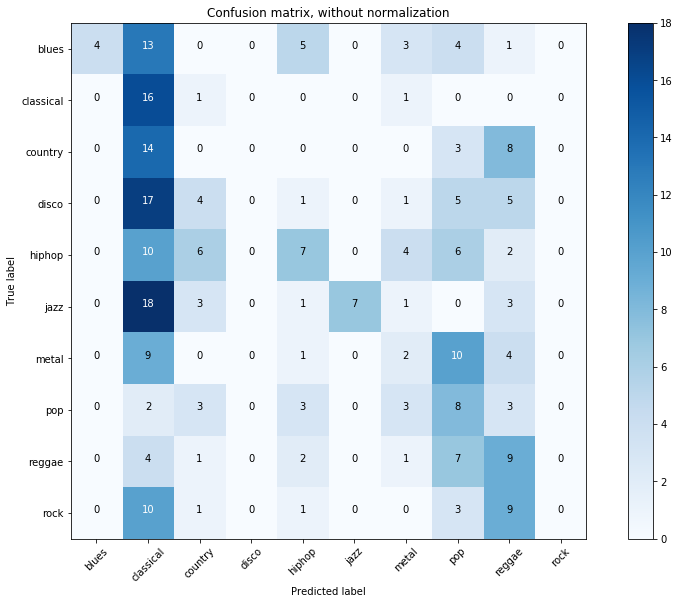

In [48]:
# Plot non-normalized confusion matrix
label = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # class labels
fig=plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label, title='Confusion matrix, without normalization')
fig.set_size_inches(12, 10)
ax = fig.add_subplot(111)
plt.show()
#fig.savefig('confusion_mat_LR_feature2.eps')  # save figure

# 10 fold cross validation of the training data

In [49]:
# import CV libraries
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10,shuffle=True,random_state=0)

In [50]:
X_c = scaled_train_data
y_c = y
df_cv = pd.DataFrame(X_c)
df_cv['label'] = y_c
train_index_all = np.zeros((10,810))
l = 0
sum = 0
for train_index, test_index in kf.split(df_cv):
    #print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    train_index_all[l,:] = train_index
    l = l + 1
    train_data_cv = X_c[train_index]
    label_train_cv = y_c[train_index]
    test_data_cv = X_c[test_index]
    label_test_cv = y_c[test_index]
    clf_svm.fit(train_data_cv,label_train_cv)
    y_pred_cv = clf_svm.predict(test_data_cv)
    y_true = label_test_cv
    y_pred = y_pred_cv
    print("Accuracy:",accuracy_score(y_true, y_pred))
    sum +=accuracy_score(y_true, y_pred)
    #sum += nltk.classify.accuracy(classifier, test_data)
average = sum/10.0

Accuracy: 0.233333333333
Accuracy: 0.222222222222
Accuracy: 0.311111111111
Accuracy: 0.333333333333
Accuracy: 0.311111111111
Accuracy: 0.211111111111
Accuracy: 0.211111111111
Accuracy: 0.266666666667
Accuracy: 0.322222222222
Accuracy: 0.255555555556


# Using test data

In [51]:
# get tesing data and FFT feature extraction
test_dict={}
test_directory = './validation/rename'
import os
for root, dirs, files in os.walk(test_directory):
    for name in files:
#        print(name)
        data, samplerate = sf.read(test_directory+'/'+name)
        test_dict[name]=abs(scipy.fft(data)[:1000])

In [52]:
# convert dictionary to  dataframe (validation Data) 
test_data=pd.DataFrame(test_dict)
test_data=test_data.transpose()
test_data.index = range(0,len(test_data))

In [53]:
# scaling
test_data_scaled =pd.DataFrame(test_data)
scaler=StandardScaler()
scaler.fit(test_data_scaled)
scaled_test_data=scaler.transform(test_data_scaled)

In [27]:
# predict test data classes with logistic regression (LR) and save the results in excel file
clf_lr.fit(X,y)
lr_pred = clf_lr.predict(scaled_test_data)
df = pd.DataFrame(list(lr_pred))
df.to_excel('output.xlsx', header='class', index=False)

In [28]:
# predict test data classes with SVM and save the results in excel file
clf_svm.fit(X,y)
svc_pred = clf_svm.predict(scaled_test_data)
df = pd.DataFrame(list(svc_pred))
df.to_excel('output.xlsx', header='class', index=False)